# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Lab4/data_banknote_authentication.csv")

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Diving the data into features and labels (X and y)

In [6]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [24]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

n_estimators_values = [10,12,14,18,20,21,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]

# Define the parameter grid
param_grid = {
    'n_estimators': [10,12,14,18,20,21,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 21}
Best Accuracy: 0.996875


Evaluate the model by displaying a confusion matrix and a classification report 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



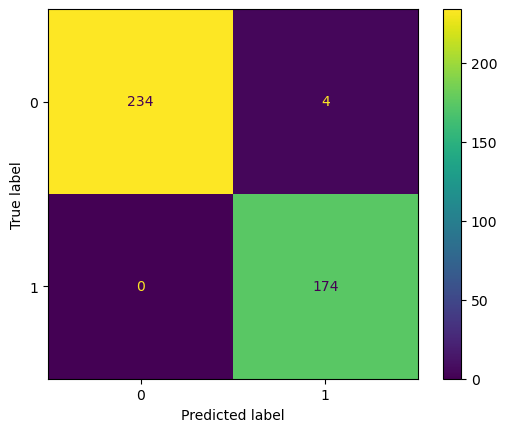

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print Classification Report
print(classification_report(y_test, y_pred))

D:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       238
           1       0.99      0.97      0.98       174

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



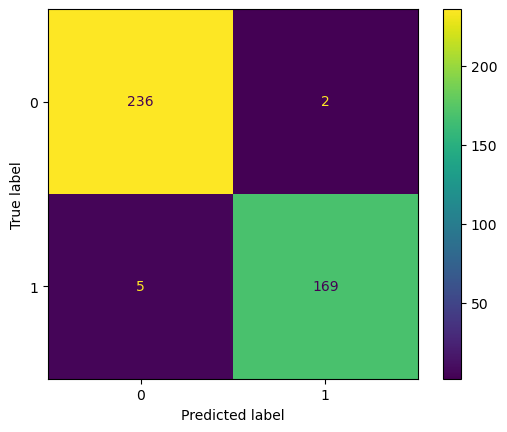

In [27]:
model = RandomForestClassifier(n_estimators=2,max_features='auto',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print Classification Report
print(classification_report(y_test, preds))